In [1]:
pip --version python

pip 25.1 from C:\Users\302sy\anaconda3\Lib\site-packages\pip (python 3.13)

Note: you may need to restart the kernel to use updated packages.


# AdEase Time Series - Forecasting webpage views for smarter Ad Placements
**Leveraging AI and timeseries forecasting to Optimize Digital Advertising**

## Introduction
In today's digital-first world, advertising is everywhere -- but success depends on putting the right message in front of the right audience at the right time.

This project explores how AdEase, an advertising and marketing company, can use data science to make ad placements smarter and more cost-effective.

We are provided with a fascinating dataset:
- 145,000+ webpages
- Daily page views tracked over 550 days
- Additional information about special events or campaigns that might influence traffic(for english pages.)

The core challenge is to: 
- Understand past page view patterns
- Forecast future views
- Use these predictions to optimize ad placements, ensuring our clients achieve maximum visibility at minimum cost.

Whats in it for you:
- Sudden spike in page views (e.g., during elections, sports events, or cultural moments) creates oppurtunities for targeted ads.
- Different regions and languages have unique trends, so ads must adapt to the right audience.
- with accurate forecasting, business can place ads before the wave hits, riding trends instead of chasing them.

📌 Key Question We’re Answering:
> “How can we forecast webpage views across different languages and devices to help businesses place smarter, cost-effective ads?”

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Load and Understand the Data

In [3]:
# adjust path
from pathlib import Path
DATA_DIR = Path('data')

# load the data
original_train_data = pd.read_csv(DATA_DIR/"train_1.csv")
original_exog_data= pd.read_csv(DATA_DIR/'Exog_Campaign_eng.csv')

# create copies for better preserving
exog_df = original_exog_data.copy(deep= True)
df = original_train_data.copy(deep = True)
df.head()

,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [7]:
df = df.set_index('Page') # set the first column as index
df.head()

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,48.0,9.0,25.0,13.0,3.0,11.0,27.0,13.0,36.0,10.0


In [4]:
exog_df.head()https://zh.wikipedia.org/wiki/2NE1

,Exog
0,0
1,0
2,0
3,0
4,0


In [5]:
dr, dc = df.shape
er, ec = exog_df.shape

# 
print(f"Number of rows in views data main: {dr}")
print(f"Number of columns in views data main: {dc}\n")

print(f"Number of rows in exog data: {er}")
print(f"Number of columns in exog data: {ec}")

Number of rows in views data main: 145063
Number of columns in views data main: 551

Number of rows in exog data: 550
Number of columns in exog data: 1


**What does each row represent (a page) and each column represent(a date)**
1. **train_1.csv**
    - Each **row** in the dataset represents a webpage where each page tells you four things
        - article_name or topic: 2ne1 a k pop girl group
        - The language code and target site/domain - zn: Chinese, domain: wikipedia
        - The access type(desktop, mobile, all) - all: viewed by all devices
        - The access origin(browser, spider, or all) - spider: crawling bot
    - Each **column** is a date upto 550 days. where views monitored and recorded for respective webpages.
2. **Exog_Campaign_eng.csv**
    - This is much smaller file where
        - 1 -> There was a big event/campaign that day where some event is happeing like elections ansd all.
        - 0 -> Nothing special, just a normal day.

### Missing Values - Date columns

In [18]:
# do we have exactly 550 days of data? Any missing days
## First let's convert the columns into datetime format..

date_cols = pd.to_datetime(df.columns)

In [19]:
#calculate the date range - since we have converted date_cols into datetime and there's no error

full_range = pd.date_range(start= date_cols.min(), end= date_cols.max(), freq= 'D')
missing_dates= full_range.difference(date_cols)

print("Missing dates: ", missing_dates)

Missing dates:  DatetimeIndex([], dtype='datetime64[ns]', freq='D')


### Missing Values - Pages(row wise)

In [90]:
# Nan values in the dataset
null_count_data = df.isna().sum(axis= 1)
null_count_data

Page
2NE1_zh.wikipedia.org_all-access_spider                                                       0
2PM_zh.wikipedia.org_all-access_spider                                                        0
3C_zh.wikipedia.org_all-access_spider                                                         0
4minute_zh.wikipedia.org_all-access_spider                                                    0
52_Hz_I_Love_You_zh.wikipedia.org_all-access_spider                                         291
                                                                                           ... 
Underworld_(serie_de_películas)_es.wikipedia.org_all-access_spider                          544
Resident_Evil:_Capítulo_Final_es.wikipedia.org_all-access_spider                            550
Enamorándome_de_Ramón_es.wikipedia.org_all-access_spider                                    550
Hasta_el_último_hombre_es.wikipedia.org_all-access_spider                                   550
Francisco_el_matemático_(serie_de_t

In [91]:
# since we cannot see all null count lets summarize using describe

null_count_data.describe()

count    145063.000000
mean         42.691320
std         115.804572
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         550.000000
dtype: float64

There are lots of null values in the data set but not more than 25 percent so it's not of a big deal
- There are few pages where we don't get the user data at all like all of them are nulls 550.
- Let's set a threshold so that we don't lose much data and remove the nulls as well.

In [70]:
df[df.isna().sum(axis= 1)/df.shape[1] <= 0].shape

(117277, 550)

Let's more deep dive into the nulls on how it looks alike

In [92]:
print((null_count_data==0).sum())

117277


Total Pages:  145063
Pages with no missing values 117277
Pages with some missing values 27786
Max missing days for a page:  550
Min missing days for a page:  0
Average missing days per page:  42.69132032289419


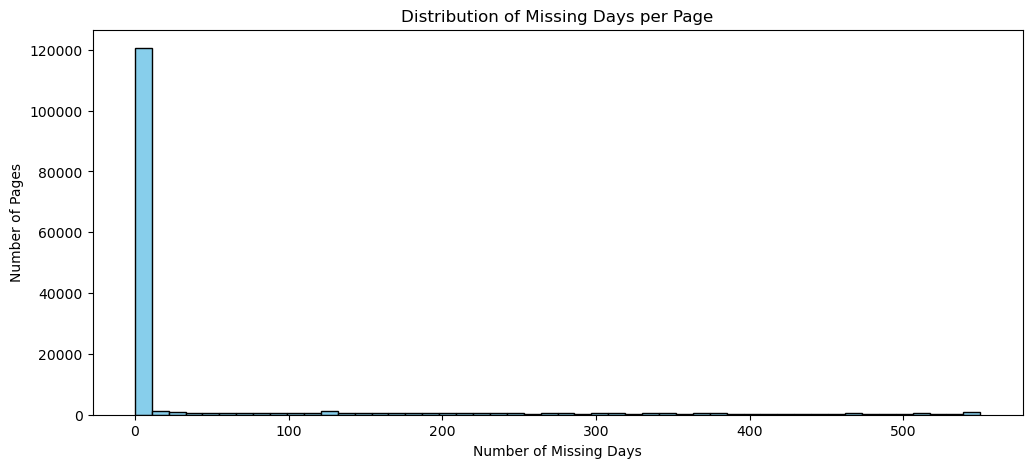

In [94]:
# Quick Statistics
print("Total Pages: ", df.shape[0])
print("Pages with no missing values", (null_count_data == 0).sum())
print("Pages with some missing values", (null_count_data> 0).sum())
print("Max missing days for a page: ", null_count_data.max())
print("Min missing days for a page: ", null_count_data.min())
print("Average missing days per page: ", null_count_data.mean())

# Create a histogram to understand the values per page
plt.figure(figsize=(12,5))
plt.hist(null_count_data, bins= 50, color = 'skyblue', edgecolor= 'black')
plt.title("Distribution of Missing Days per Page")
plt.xlabel("Number of Missing Days")
plt.ylabel("Number of Pages")
plt.show()

In [109]:
# let's define a threshold balancing both data and null count. Data enough to train and min null count

threshold = 0 # 10% percent of days are nan

clean_df = df[df.isna().sum(axis= 1)/df.shape[1] <= threshold]
print(f"Pages with {threshold}% null data: ", len(clean_df))
print("No. of pages/rows removed: ", len(df) - len(clean_df))

Pages with 0% null data:  117277
No. of pages/rows removed:  27786


In [110]:
clean_df

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2016-12-22,2016-12-23,2016-12-24,2016-12-25,2016-12-26,2016-12-27,2016-12-28,2016-12-29,2016-12-30,2016-12-31
Page,,,,,,,,,,,,,,,,,,,,,
2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,32.0,63.0,15.0,26.0,14.0,20.0,22.0,19.0,18.0,20.0
2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,17.0,42.0,28.0,15.0,9.0,30.0,52.0,45.0,26.0,20.0
3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,3.0,1.0,1.0,7.0,4.0,4.0,6.0,3.0,4.0,17.0
4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,32.0,10.0,26.0,27.0,16.0,11.0,17.0,19.0,10.0,11.0
5566_zh.wikipedia.org_all-access_spider,12.0,7.0,4.0,5.0,20.0,8.0,5.0,17.0,24.0,7.0,...,16.0,27.0,8.0,17.0,32.0,19.0,23.0,17.0,17.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Chichén_Itzá_es.wikipedia.org_all-access_spider,8.0,13.0,19.0,14.0,6.0,5.0,10.0,9.0,5.0,9.0,...,15.0,18.0,12.0,6.0,5.0,14.0,10.0,174.0,8.0,19.0
Fecundación_es.wikipedia.org_all-access_spider,29.0,16.0,6.0,11.0,33.0,4.0,11.0,16.0,10.0,13.0,...,8.0,8.0,13.0,3.0,6.0,10.0,16.0,10.0,7.0,8.0
Gran_Hermano_VIP_(España)_es.wikipedia.org_all-access_spider,4.0,25.0,7.0,11.0,6.0,6.0,16.0,11.0,23.0,71.0,...,12.0,299.0,46.0,5.0,11.0,77.0,523.0,110.0,171.0,43.0
